   # Student grades prediction

## Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

## Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

### Predict - CGPA of a student based on different grades in four years.

### Dataset Link-

 1. https://github.com/dsrscientist/dataset4
 2. https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

# Import Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Data

Let's start by reading in the student-mat.csv file into a pandas dataframe.

In [44]:
stud= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [45]:
stud.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
stud.to_csv('D:Student.csv')

In [5]:
stud.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Hence, 'CGPA' is the target variable.

Checking the data types of the variable

In [6]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Checking the shapes of each dataset

In [7]:
stud.shape

(571, 43)

Hence, we can see  'ccGA' is the variable that is to be predicted

# Data Exploration

In [8]:
#Printing the first 5 rows of the train dataset
stud.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [9]:
#checking for missing values in train dataset
stud.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [19]:
stud.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


# Exploratory Data Analysis
Helper plotting functions

In [20]:
def plot_corr(stud, annot=True):
    _, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(
        stud.corr(),
        annot=annot,
        cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
        ax=ax
    )


def plot_histplot(column):
    sns.histplot(x=column, color='#65b87b', alpha=.7) 
    
    
def plot_countplot(stud, column_name, ax=None):
    _df = stud[[column_name]].copy()
    if len(_df[_df[column_name].isnull()]):
        _df.fillna('NaN', inplace=True)
    
    color = '#42b0f5' if ax != None else '#7661ff'
    sns.countplot(x=column_name, data=_df, color=color, alpha=.7, ax=ax)
    del _df

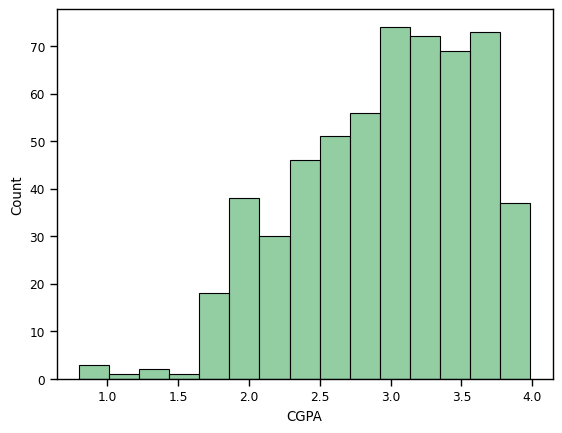

In [22]:
plot_histplot(stud['CGPA'])

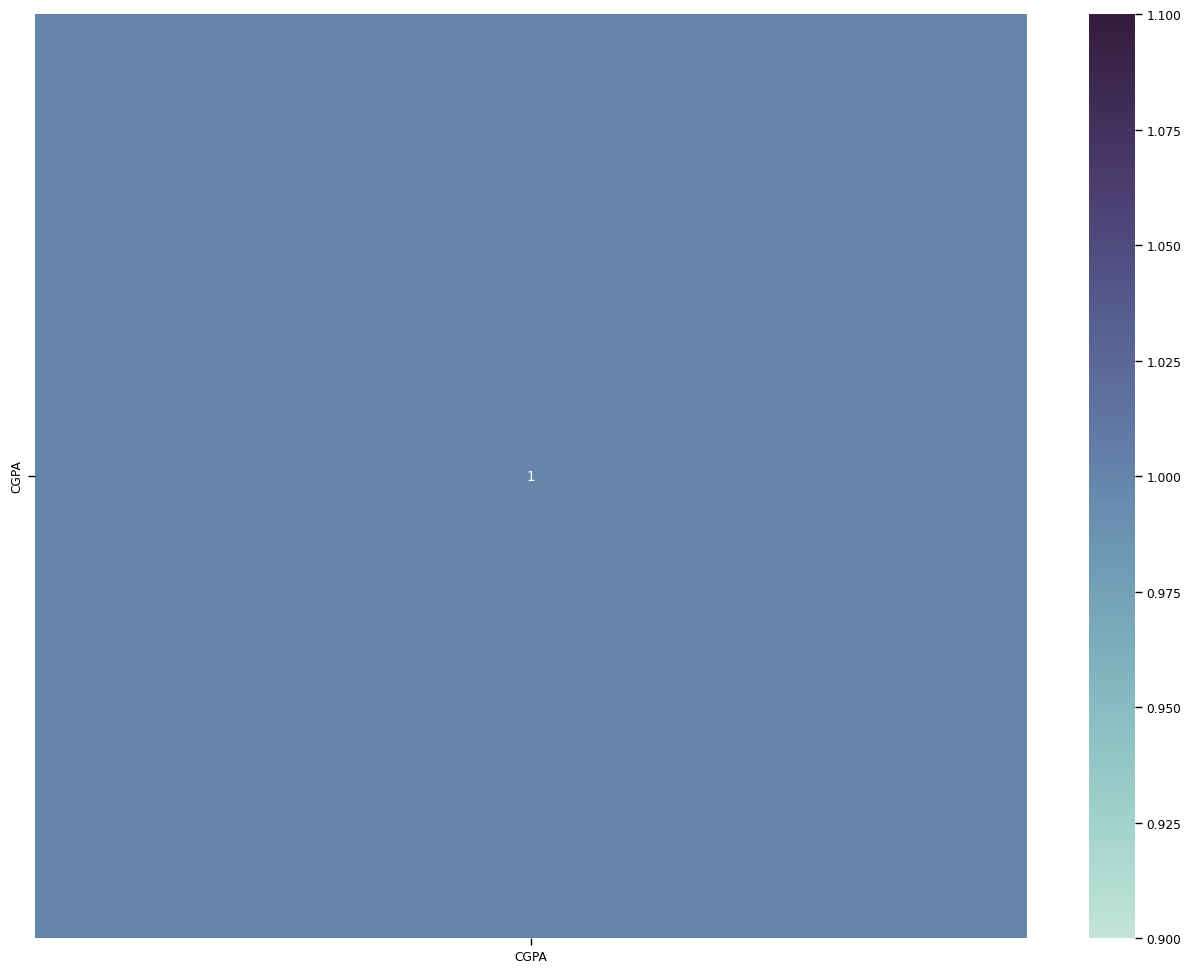

In [23]:
plot_corr(stud)

In [27]:
ohe_df = pd.get_dummies(stud.select_dtypes('object'))
ohe_df.head()

,Seat No._CS-97001,Seat No._CS-97002,Seat No._CS-97003,Seat No._CS-97004,Seat No._CS-97005,Seat No._CS-97006,Seat No._CS-97007,Seat No._CS-97008,Seat No._CS-97009,Seat No._CS-97010,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Removing one column after doing one hot encoding to avoid multi-collinearity issues
ohe_df.drop(['CS-412_W'], axis='columns', inplace=True)

In [33]:
# Removing the categorical columns and adding one hot encoded df

# Removing
categorical_columns = stud.select_dtypes('object').columns.tolist()
stud.drop(categorical_columns, axis='columns', inplace=True)

# Adding
df = pd.concat([stud, ohe_df], axis='columns')
df.head()

,CGPA,Seat No._CS-97001,Seat No._CS-97002,Seat No._CS-97003,Seat No._CS-97004,Seat No._CS-97005,Seat No._CS-97006,Seat No._CS-97007,Seat No._CS-97008,Seat No._CS-97009,...,CS-412_A-,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F
0,2.205,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.008,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.608,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.906,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.448,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Since is collinear to G1, G2 & G3
df.drop(['CGPA'], axis='columns', inplace=True)

# Data Visualization

<Axes: >

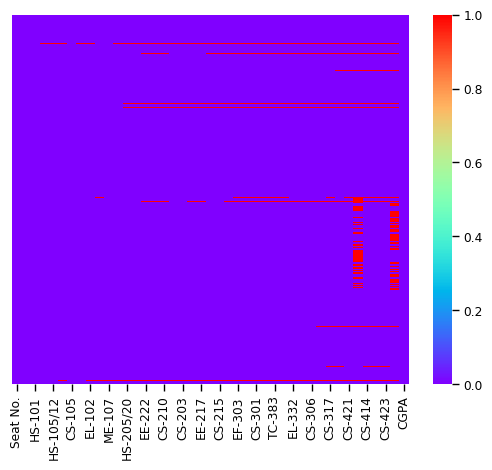

In [49]:
sns.heatmap(stud.isnull(),cmap="rainbow",yticklabels=False)    # To check any null values present in dataset pictorially

<Axes: >

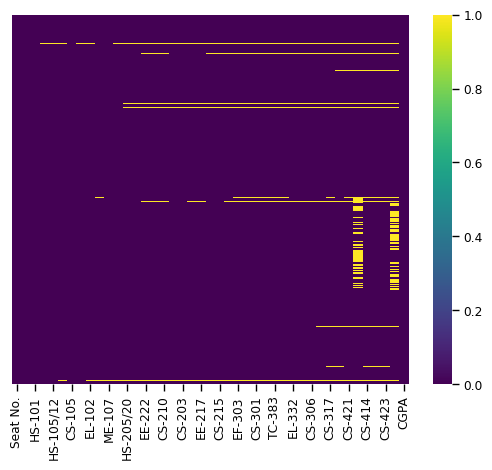

In [50]:
sns.heatmap(stud.isnull(),cmap="viridis",yticklabels=False)    # Map color - viridis

There are no null values in the given dataset

In [54]:
stud.corr()['CGPA'].sort_values()    # Correlation wrt G3

CGPA    1.0
Name: CGPA, dtype: float64

In [55]:
# Find correlations with the Grade
most_correlated = stud.corr().abs()['CGPA'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

CGPA    1.0
Name: CGPA, dtype: float64

In [56]:
stud = stud.loc[:, most_correlated.index]
stud.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


# Machine Learning Algorithms

In [59]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [60]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(stud, stud['CGPA'], test_size = 0.25, random_state=42)

In [61]:
X_train.head()

,CGPA
290,3.071
144,3.906
514,3.027
245,2.605
487,3.114


In [62]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [63]:
# find the median
median_pred = X_train['CGPA'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true CGPA values for passing into the function
true = X_test['CGPA']

In [64]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.4825
Median Baseline RMSE: 0.5722
